In [1]:
import copy
import numpy as np
import time
from neural_network import NNTrain, get_p
import nn_functions as nn
from nn_functions import relative_err_without_points as rel_err
from plots import plot_fun, plot_iteration, animate_p
from itertools import product
%matplotlib notebook
%matplotlib notebook

In [2]:
a = NNTrain(dx=0.1, bx=0.01, hidden_nodes=4, alpha=1e-3, bc=1, batch_size=32)

In [3]:
p=[]
p.append(copy.deepcopy(get_p(a)))
a.train(100)

In [ ]:
bc_multiplier = 5
thresh = 1e-6

for i in range(100000):
    p.append(copy.deepcopy(get_p(a)))
    if a.alpha < 1e-9  or a.bc > 100000:
        break
    if np.abs(np.mean([s-t for s, t in zip(a.cost_rate[-101:], a.cost_rate[-100:])])) < thresh:
        a.bc *= bc_multiplier
        a.alpha /= bc_multiplier
    a.train(100)

In [15]:
a.bc *= bc_multiplier
a.alpha /= bc_multiplier

In [4]:
print('alpha:', a.alpha)
print('BC:', a.bc)
print('relative error:', rel_err(a.p00, a.p01, a.p1, a.p2, dx=0.02))
print('number of iterations:', len(a.cost_rate))

alpha: 0.001
BC: 1
relative error: 0.991293242786242
number of iterations: 101


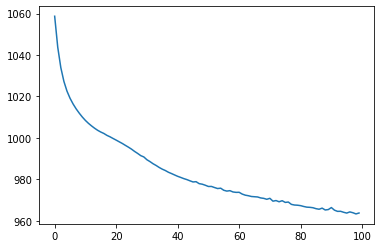

In [5]:
plot_iteration(a.cost_rate, min_it=1)

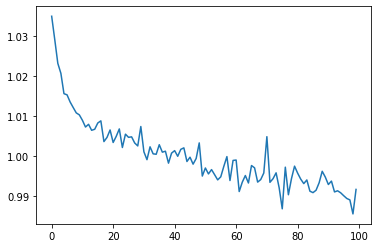

In [6]:
plot_iteration(a.rel_err, min_it=1)

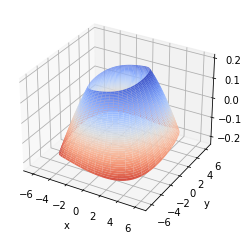

In [7]:
plot_fun(nn.N, p00=a.p00, p01=a.p01, p1=a.p1, p2=a.p2)

<IPython.core.display.Javascript object>


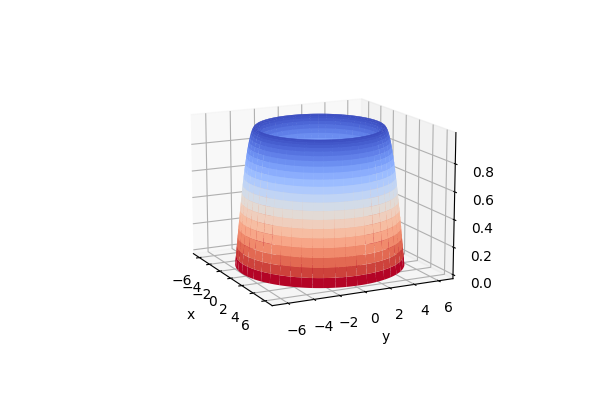

In [11]:
plot_fun(nn.psi_a)

### Load parameters

In [ ]:
name_str = '20200817-2017_eq1_1_v6'

par = np.load('output/' + name_str + '_nn_params.npz', allow_pickle=True)['arr_0']
a.p00 = par[0][0]
a.p01 = par[0][1]
a.p1 = par[1]
a.p2 = par[2]
a.cost_rate = list(np.load('output/' + name_str + '_cost_rate.npz')['arr_0'])
a.rel_err = list(np.load('output/' + name_str + '_rel_err.npz')['arr_0'])
a.m_t = np.load('output/' + name_str + '_momentum.npz')['arr_0']

In [25]:
output_name = 'disk_soft_0_v1'
timestr = time.strftime("%Y%m%d-%H%M")

a.save_result(output_name)

np.savez('output/'+ timestr + '_' + output_name +'_p_list.npz', p)